In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import numpy as np

from Newmark import *
from meshes import *
from get_M import *
from get_S import *

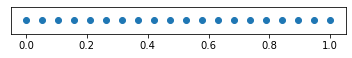

In [2]:
# Spatial resolution of mesh
N = 20

# Right limit of mesh
L = 1

# Generate 1D mesh
[nodes, elems, faces] = get_mesh_1D(N, [0,L], True);
elems = np.array(elems)[:-1,:]          # I believe there is one row too much in elems from get_mesh function

In [3]:
E=1
I=1
mu = 1

S_ext = get_extended_M(nodes, elems, mu, True)

C:\Users\sergi\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


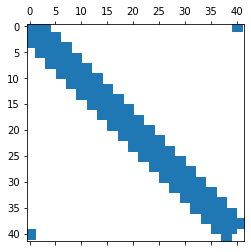

In [4]:
plt.spy(S_ext)

In [5]:
M0 = 0
ML = 0
a0 = 0
aL = 0

boundary_conditions = {'M0': M0, 'ML': ML, 'a0': a0, 'aL': aL}

M_ext = get_extended_M(nodes, elems, mu, True)
S_ext = get_extended_S(nodes, elems, E, I, True)
rhs = get_extended_q_vector(nodes, elems, 1, boundary_conditions, True)

uu = lambda x: x**2
uup = lambda x: 0
uupp = lambda x: 0

uu_ = lambda x: x**2
uup_ = lambda x: 0
uupp_ = lambda x: 0

print(nodes)

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [6]:
S_ext = get_extended_S(nodes, elems, 1, 1, True)

rhs1 = get_extended_q_vector(nodes, elems, 5, boundary_conditions, True)
rhs2 = get_extended_q_vector(nodes, elems, 1, boundary_conditions, True)

# get FEM solution
solution = spsolve(S_ext, rhs1)

asymptoticalsolution = spsolve(S_ext, rhs2)
asymptoticalsolution = asymptoticalsolution[:-2]
asymptoticalsolution = asymptoticalsolution[::2]

up1 = np.zeros((np.shape(solution)))
upp1 = np.zeros((np.shape(solution)))


new = Newmark(u1=solution, up1=up1, upp1=upp1, h=0.01, beta=1/4, gamma=1/2, Me=M_ext, Se=S_ext, f=rhs2)


nsteps=1000

new.run(nsteps)

(array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]),
 array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]),
 array([ 0., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan]),
 99.9999999999986)

In [7]:
results = new.results

In [8]:
u = results["u"]

def sol_step(u, i):

    u = u[i]
    u = u[:-2]
    ux = u[::2]
    
    return ux


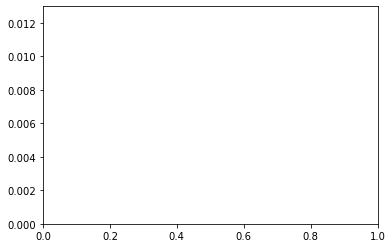

In [9]:
%matplotlib inline

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
try: ax.set_ylim((np.min(u[nsteps-1][:-2][::2]), np.max(u[nsteps-1][:-2][::2])))
except: ax.set_ylim((np.min(asymptoticalsolution), np.max(asymptoticalsolution)))
        
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    line.set_data(nodes, sol_step(u, i))
    return (line,)

In [10]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nsteps, interval=20, 
                               blit=True)
HTML(anim.to_jshtml())

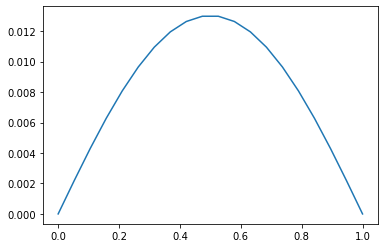

In [11]:
plt.plot(nodes, asymptoticalsolution)